# Explaining probability plots

This is a notebook accompanying my Medium article which can be found [here]().

## Importing libraries

In [1]:
%load_ext rpy2.ipython

import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as scs
import probscale

%config InlineBackend.figure_format ='retina'
%matplotlib inline
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

In [2]:
def pp_plot(x, dist, line=True, ax=None):
    '''
    Function for comparing empirical data to a theoretical distribution by using a P-P plot.
    
    Params:
    x - empirical data
    dist - distribution object from scipy.stats; for example scipy.stats.norm(0, 1)
    line - boolean; specify if the reference line (y=x) should be drawn on the plot
    ax - specified ax for subplots, None is standalone
    '''
    if ax is None:
        ax = plt.figure().add_subplot(1, 1, 1)
        
    n = len(x)
    p = np.arange(1, n + 1) / n - 0.5 / n
    pp = np.sort(dist.cdf(x))
    sns.scatterplot(x=p, y=pp, color='blue', edgecolor='blue', ax=ax)
    ax.set_title('PP-plot')
    ax.set_xlabel('Theoretical Probabilities')
    ax.set_ylabel('Sample Probabilities')
    ax.margins(x=0, y=0)
    
    if line: ax.plot(np.linspace(0, 1), np.linspace(0, 1), 'r', lw=2)
    
    return ax

## Drawing Random Variables

In [3]:
# generate random variables

s_size = 100000 # sample size

rv_std_norm = np.random.normal(size=s_size) # standard normal
rv_norm = np.random.normal(loc=1, scale=2.5, size=s_size) # normal
rv_skew_norm = scs.skewnorm.rvs(a=5, size=s_size) # skew normal

## Standard Normal Distribution, PDF, CDF

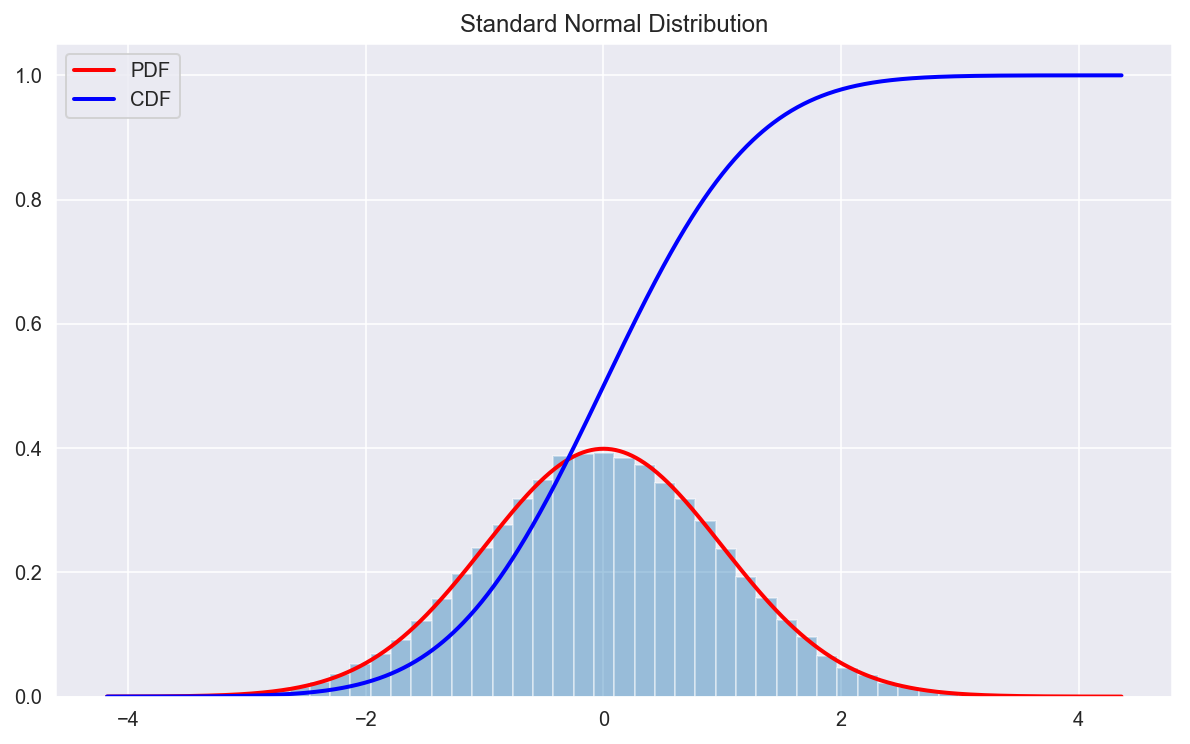

In [4]:
# plot the histogram, PDF and CDF of Standard Normal distribution

ax = sns.distplot(rv_std_norm, kde=False, norm_hist=True)                                    
rv_range = np.linspace(min(rv_std_norm), max(rv_std_norm), num=1000)                                                  
std_norm_pdf = scs.norm.pdf(rv_range)           
std_norm_cdf = scs.norm.cdf(rv_range)                                                         

ax.plot(rv_range, std_norm_pdf, 'r', lw=2, label='PDF')
ax.plot(rv_range, std_norm_cdf, 'b', lw=2, label='CDF')

ax.set_title('Standard Normal Distribution')
ax.legend();

## Comparison of distributions

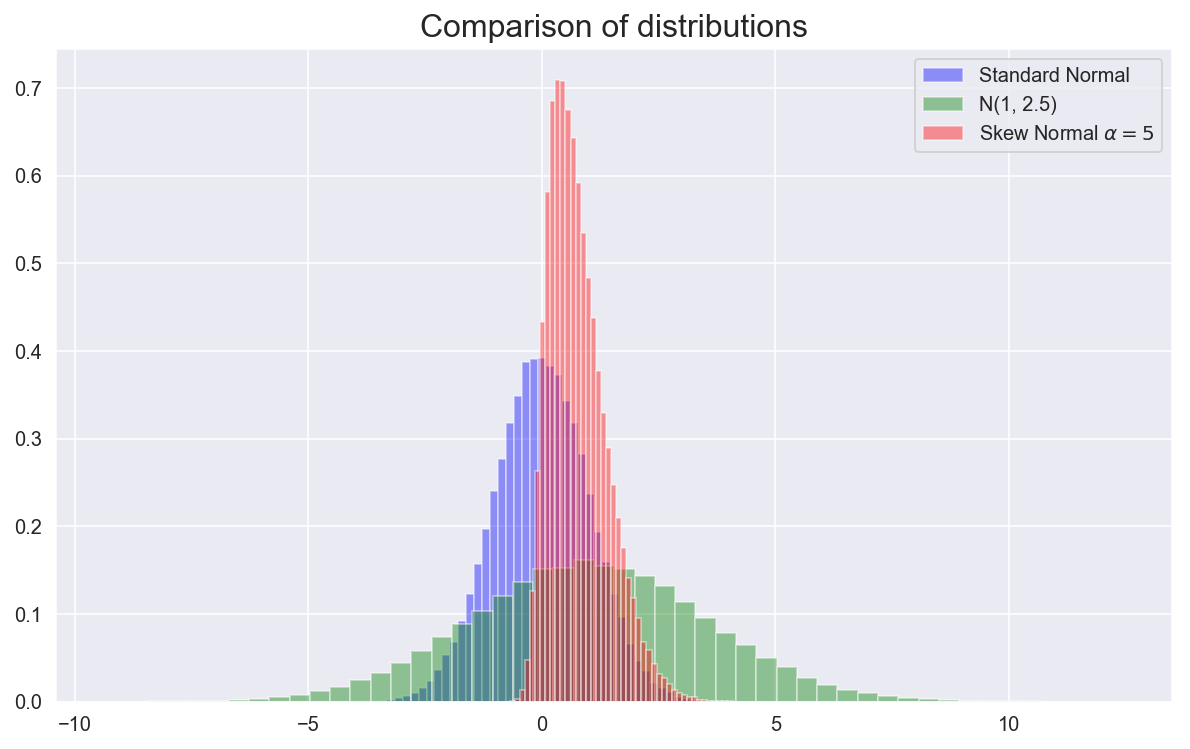

In [5]:
# plot all 3 considered distributions for comparison 

sns.distplot(rv_std_norm, kde=False, norm_hist=True, color='blue', label='Standard Normal')                                    
sns.distplot(rv_norm, kde=False, norm_hist=True, color='green', label='N(1, 2.5)')
sns.distplot(rv_skew_norm, kde=False, norm_hist=True, color='red', label='Skew Normal $\\alpha = 5$')
plt.title('Comparison of distributions', fontsize=16)
plt.legend();

## P-P Plot

### Standard Normal

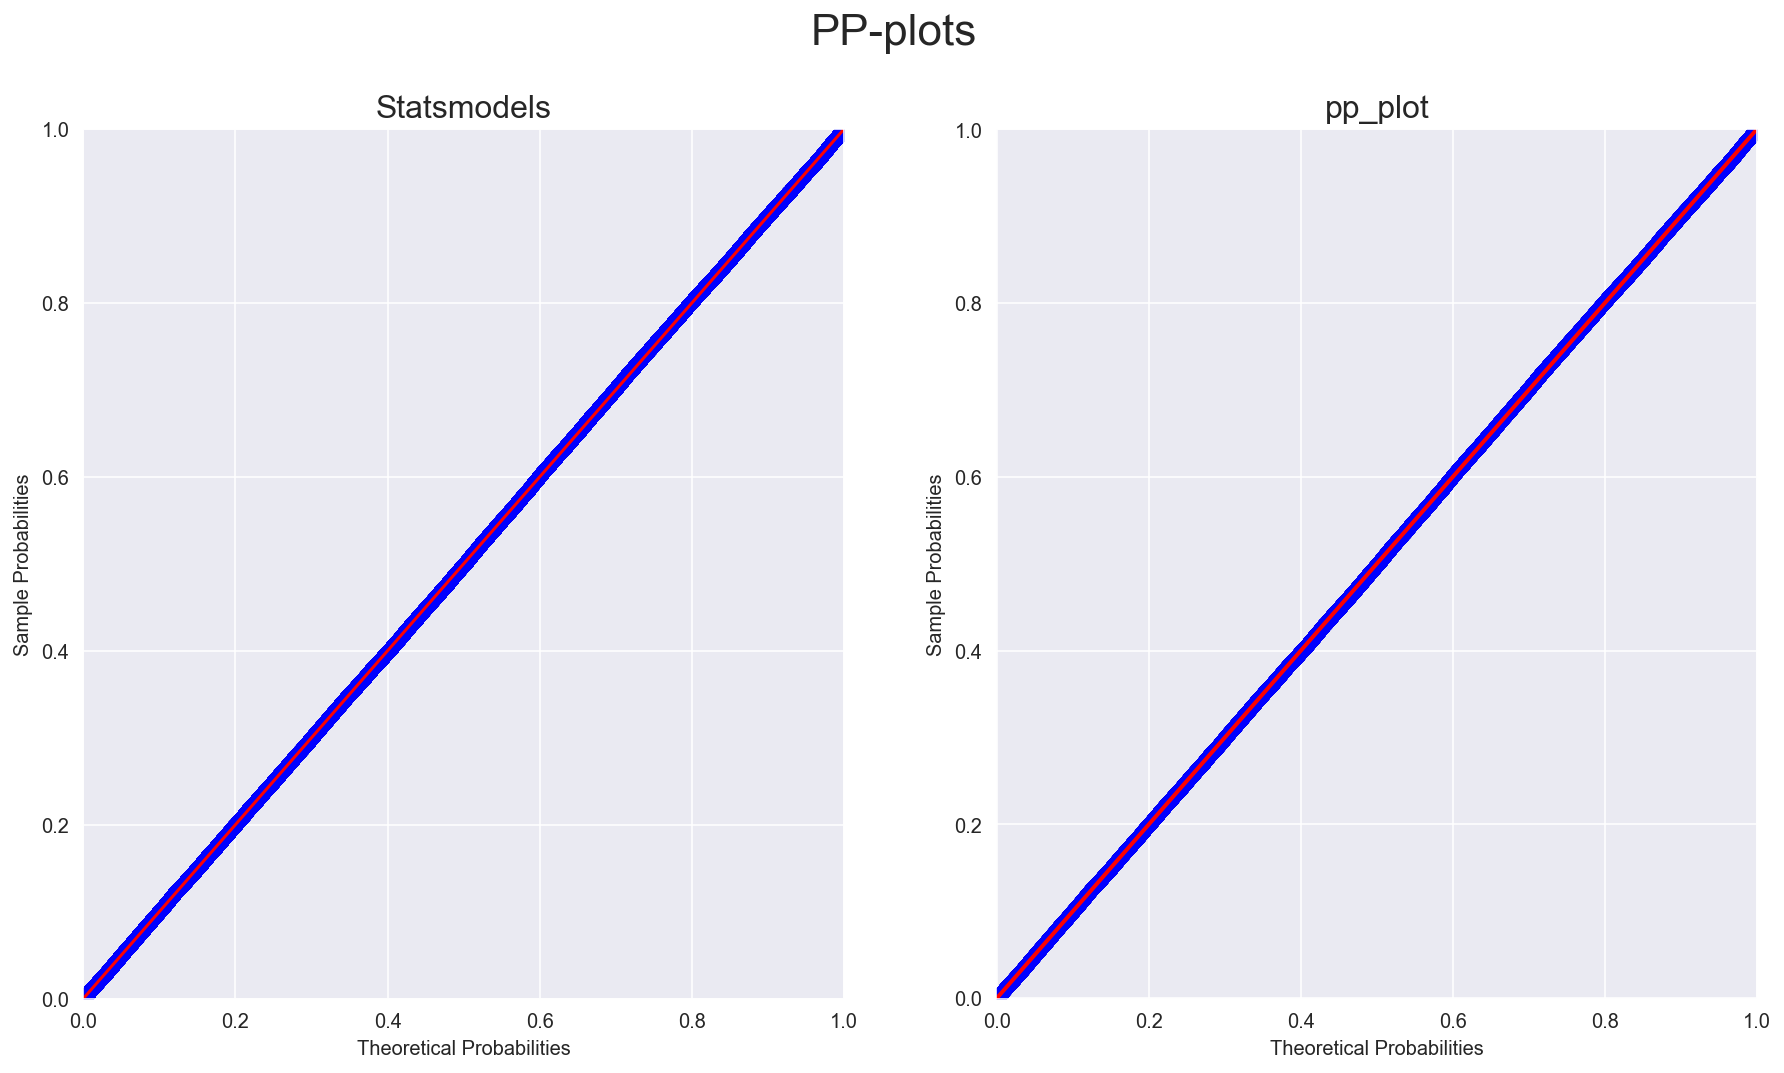

In [6]:
# compare statsmodels and my implementation of PP plots for Standard Normal distr

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

fig.suptitle('PP-plots', fontsize=22)

sm.ProbPlot(rv_std_norm, scs.norm, loc=0, scale=1).ppplot(line='45', ax=ax[0])
ax[0].set_title('Statsmodels', fontsize=16)

pp_plot(rv_std_norm, scs.norm(loc=0, scale=1), ax=ax[1])
ax[1].set_title('pp_plot', fontsize=16)

plt.show()

### Normal(1, 2.5)

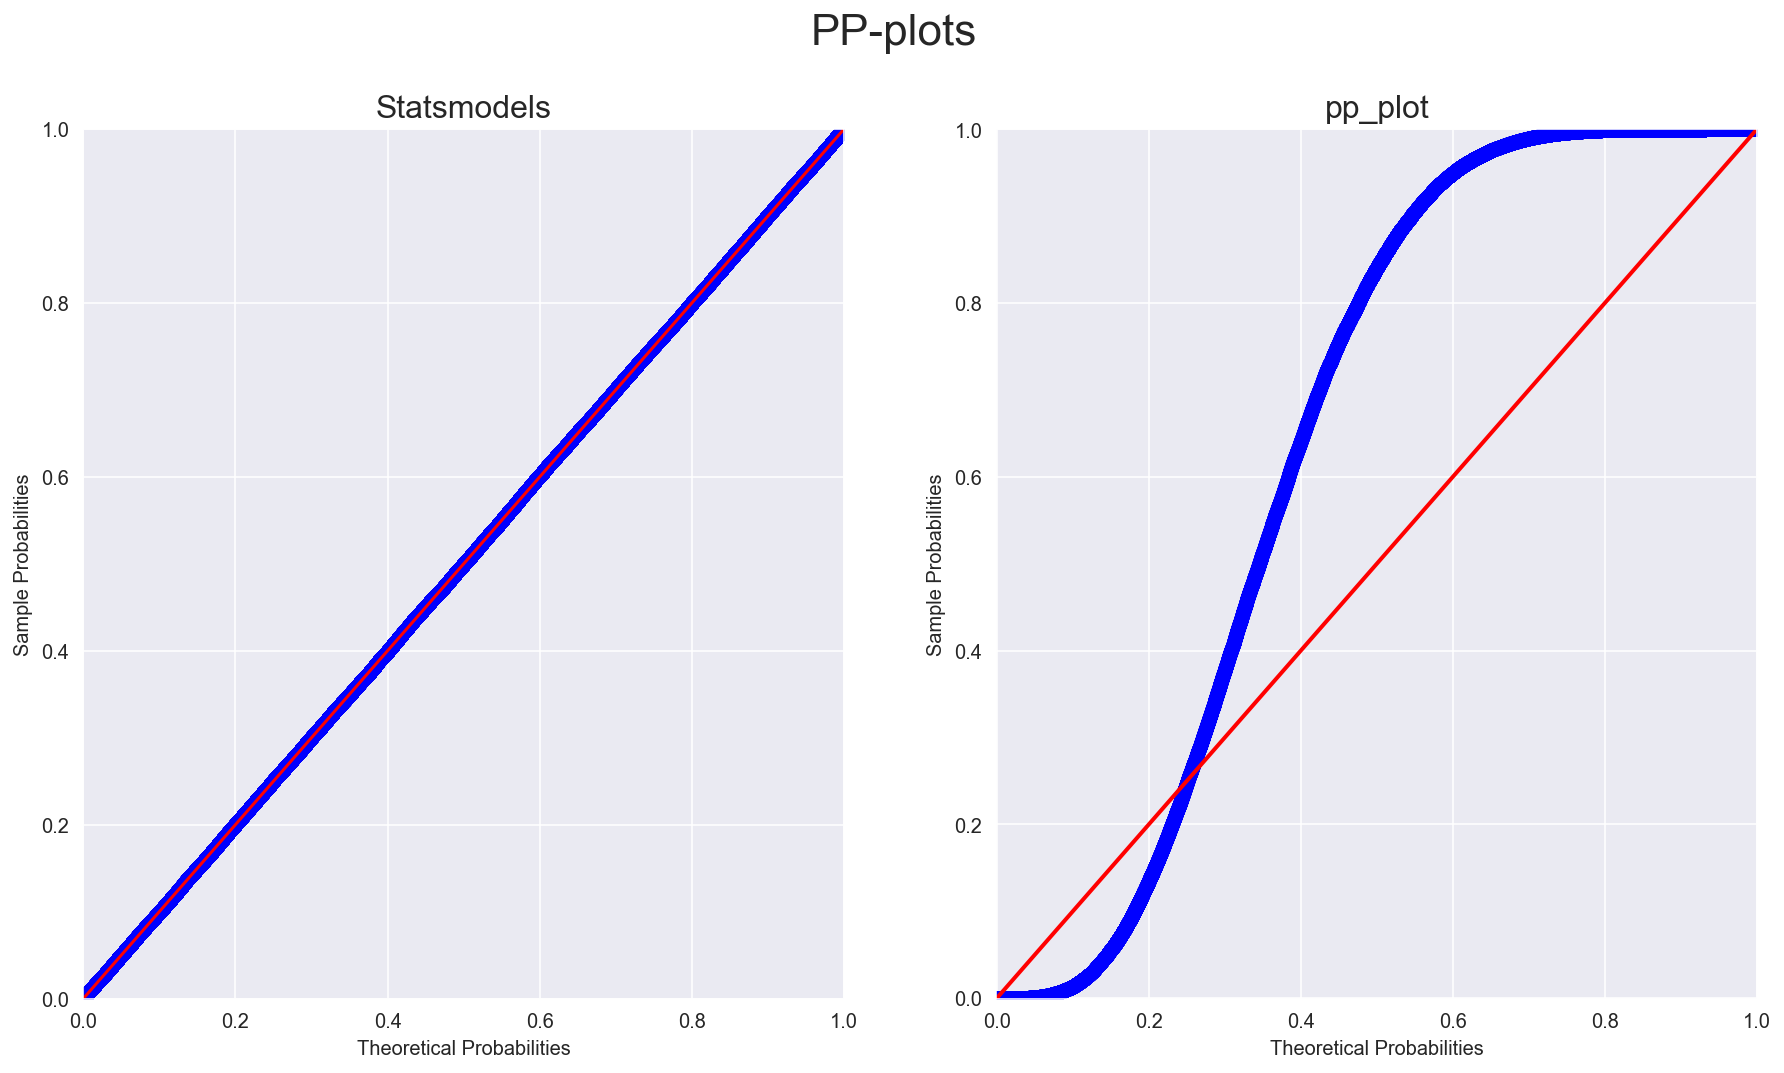

In [7]:
# compare statsmodels and my implementation of PP plots for N(1, 2.5) distr

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

fig.suptitle('PP-plots', fontsize=22)

sm.ProbPlot(rv_norm, scs.norm, loc=0, scale=1).ppplot(line='45', ax=ax[0])
ax[0].set_title('Statsmodels', fontsize=16)

pp_plot(rv_norm, scs.norm(loc=0, scale=1), ax=ax[1])
ax[1].set_title('pp_plot', fontsize=16)

plt.show()

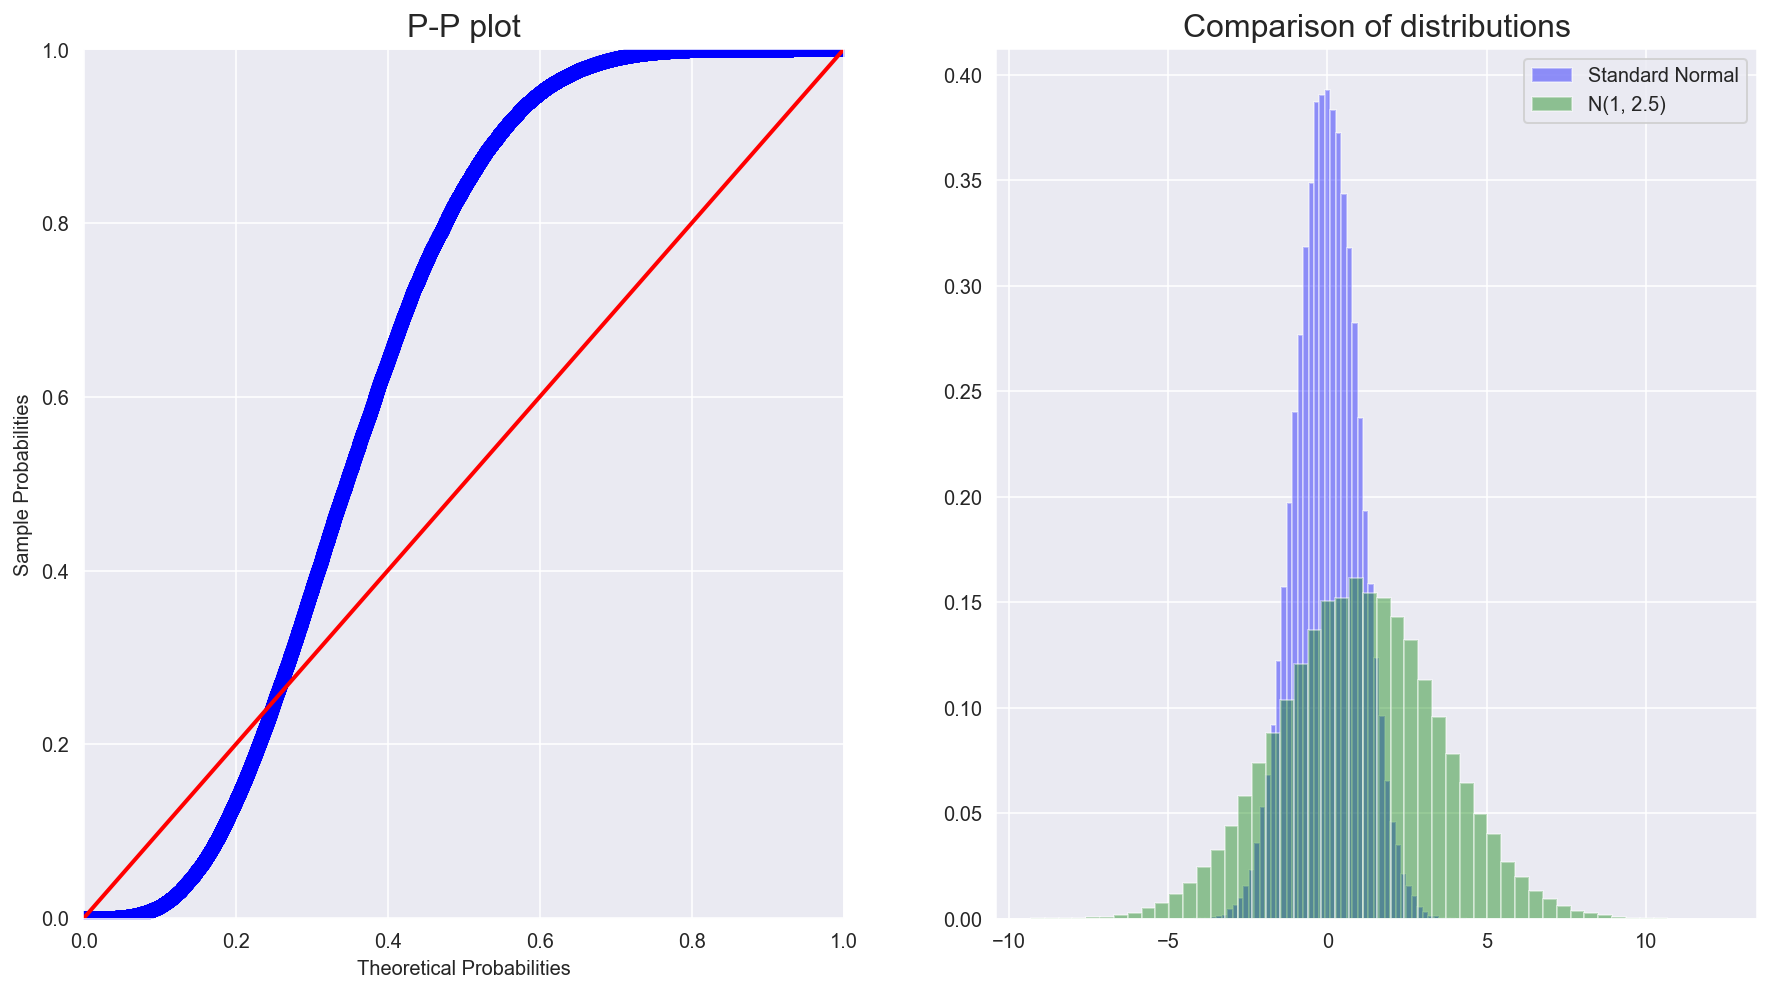

In [8]:
# plot P-P plot and histograms of considered distributions 

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

pp_plot(rv_norm, scs.norm(loc=0, scale=1), ax=ax[0])
ax[0].set_title('P-P plot', fontsize=16)

sns.distplot(rv_std_norm, kde=False, norm_hist=True, color='blue', label='Standard Normal', ax=ax[1])                                    
sns.distplot(rv_norm, kde=False, norm_hist=True, color='green', label='N(1, 2.5)', ax=ax[1])
plt.title('Comparison of distributions', fontsize=16)
plt.legend();

plt.show()

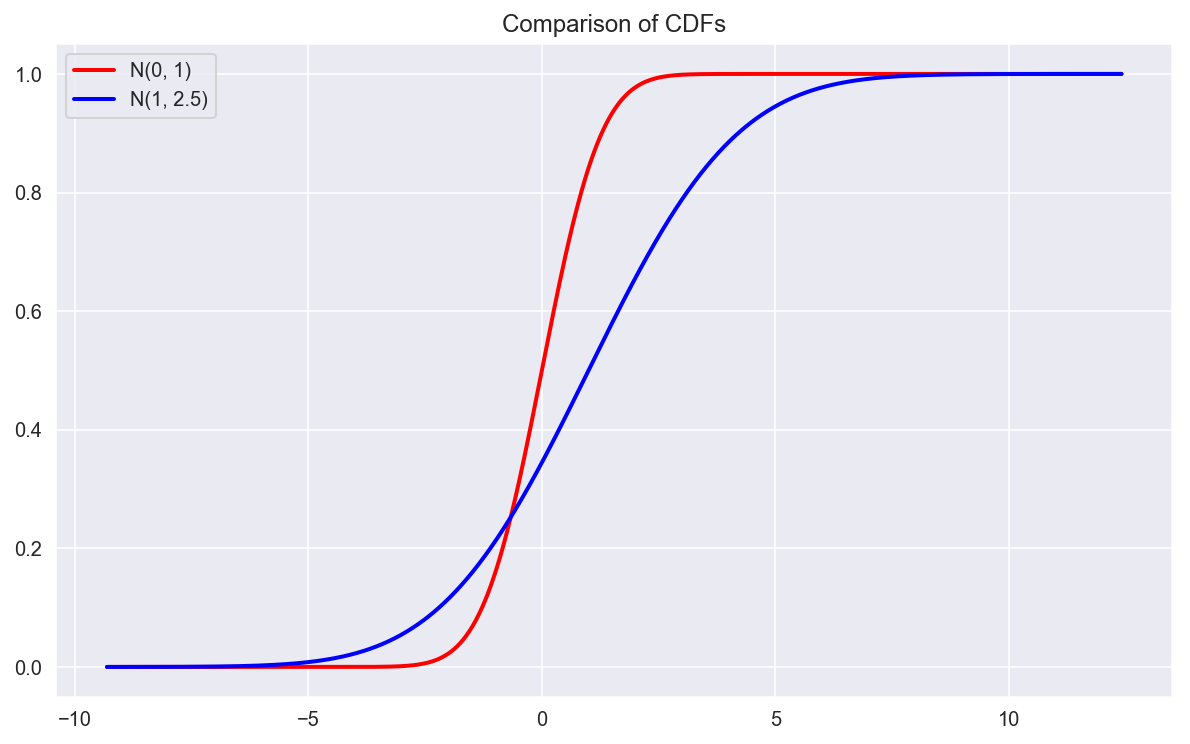

In [9]:
# plot comparison of CDFs
rv_range = np.linspace(min(rv_norm), max(rv_norm), num=1000)                                                  
std_norm_cdf = scs.norm.cdf(rv_range)                                                         
norm_cdf = scs.norm(1, 2.5).cdf(rv_range)                                                         

plt.plot(rv_range, std_norm_cdf, 'r', lw=2, label='N(0, 1)')
plt.plot(rv_range, norm_cdf, 'b', lw=2, label='N(1, 2.5)')

plt.title('Comparison of CDFs')
plt.legend();

### Skew Normal a=5

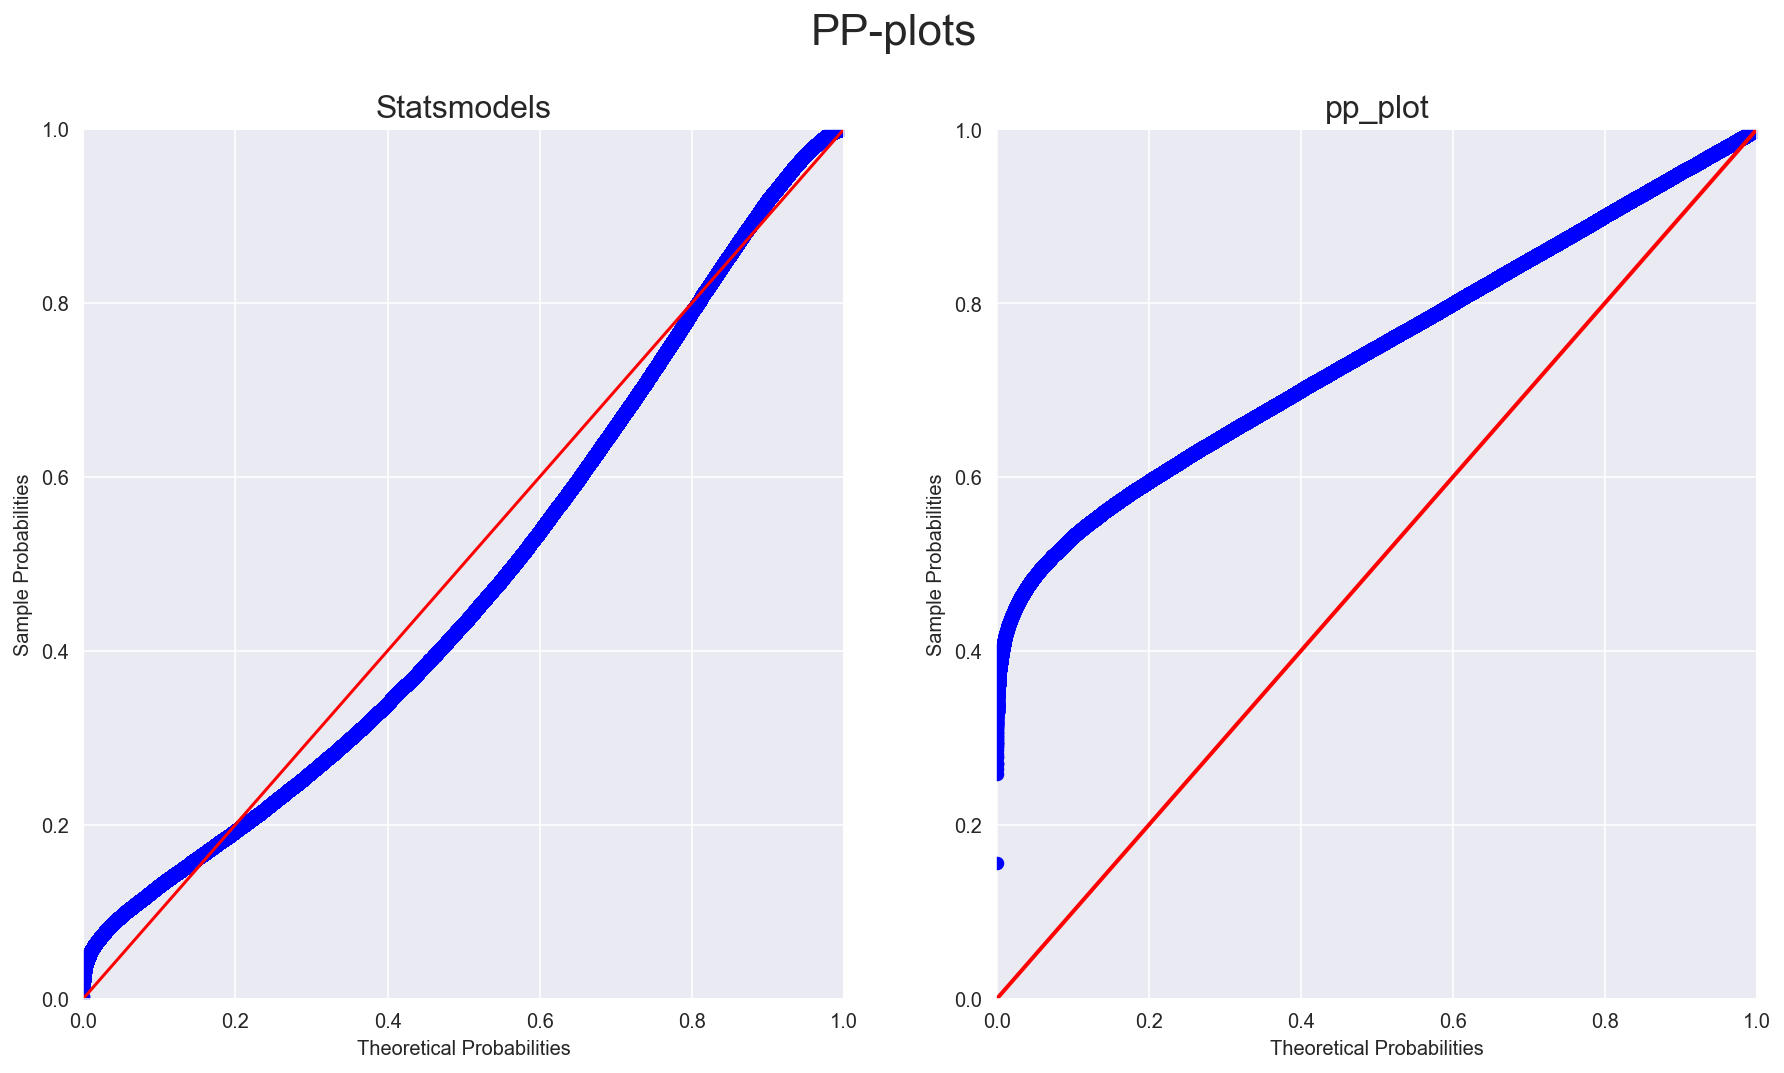

In [10]:
# compare statsmodels and my implementation of PP plots for Skew Normal distr

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

fig.suptitle('PP-plots', fontsize=22)

sm.ProbPlot(rv_skew_norm, scs.norm, loc=0, scale=1).ppplot(line='45', ax=ax[0])
ax[0].set_title('Statsmodels', fontsize=16)

pp_plot(rv_skew_norm, scs.norm(loc=0, scale=1), ax=ax[1])
ax[1].set_title('pp_plot', fontsize=16)

plt.show()

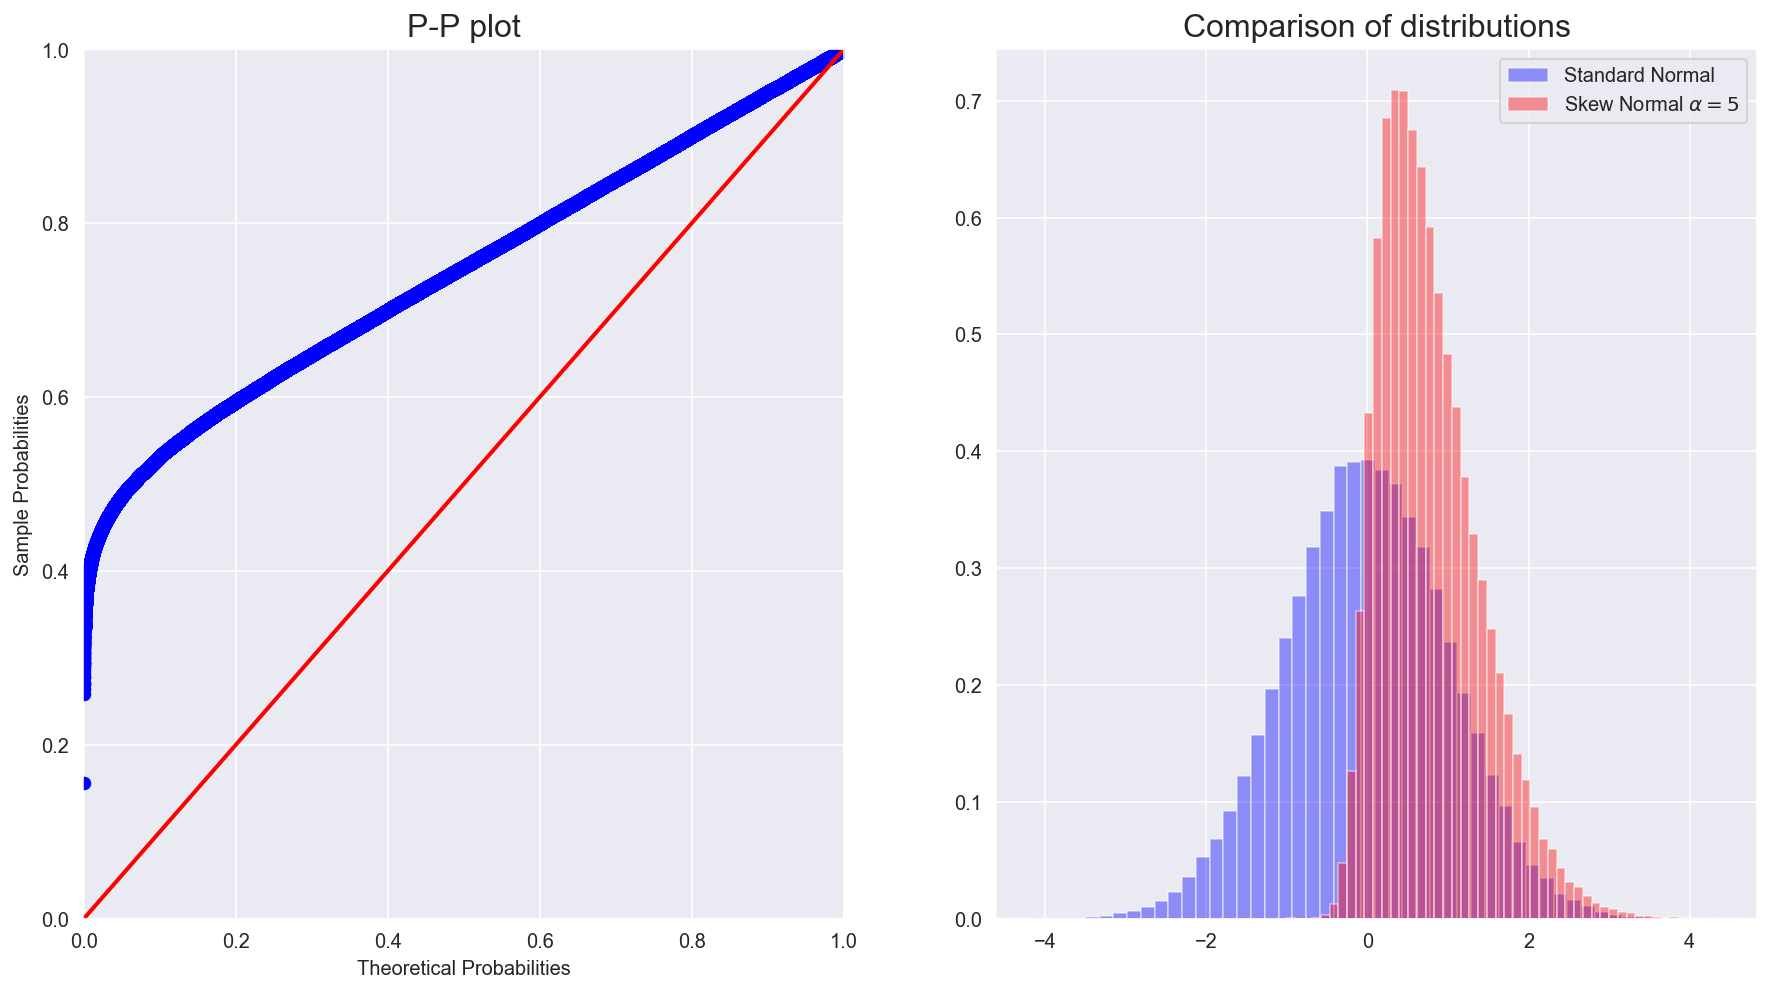

In [11]:
# plot P-P plot and histograms of considered distributions 

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

pp_plot(rv_skew_norm, scs.norm(loc=0, scale=1), ax=ax[0])
ax[0].set_title('P-P plot', fontsize=16)

sns.distplot(rv_std_norm, kde=False, norm_hist=True, color='blue', label='Standard Normal', ax=ax[1])                                    
sns.distplot(rv_skew_norm, kde=False, norm_hist=True, color='red', label='Skew Normal $\\alpha = 5$', ax=ax[1])
plt.title('Comparison of distributions', fontsize=16)
plt.legend();

plt.show()

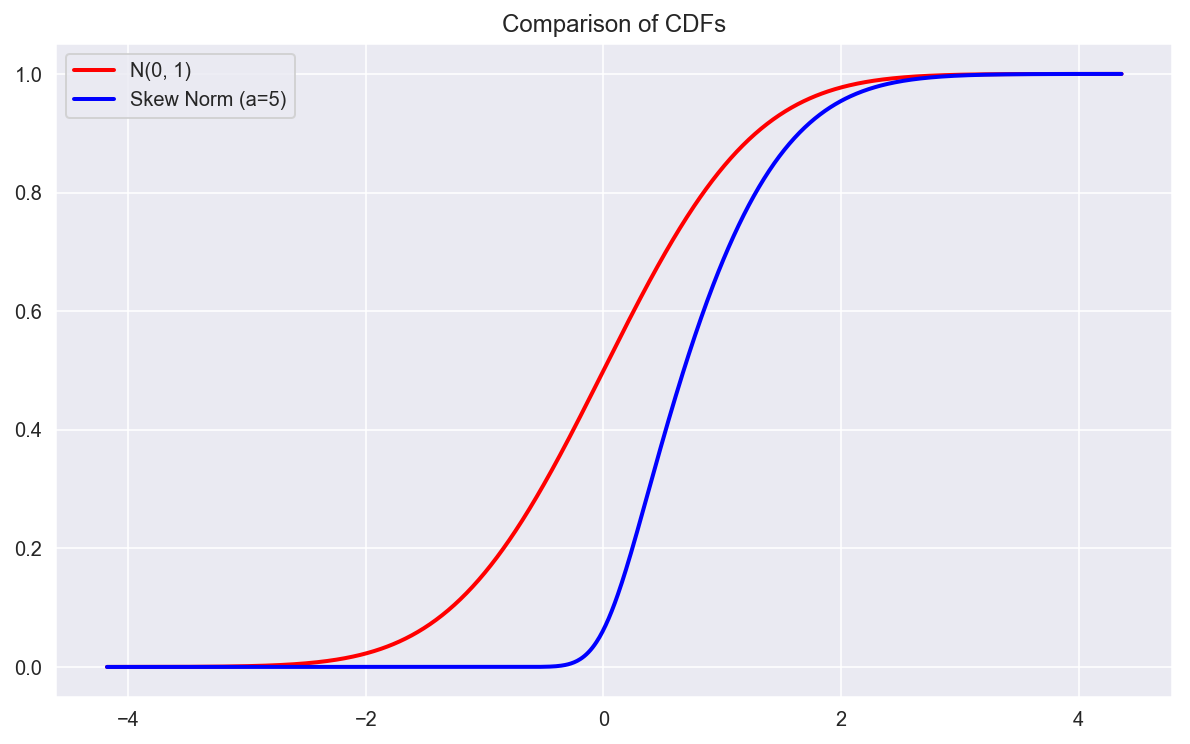

In [12]:
# plot comparison of CDFs

rv_range = np.linspace(min(rv_std_norm), max(rv_std_norm), num=1000)                                                  
std_norm_cdf = scs.norm.cdf(rv_range)                                                         
skew_norm_cdf = scs.skewnorm(a=5).cdf(rv_range)                                                         

plt.plot(rv_range, std_norm_cdf, 'r', lw=2, label='N(0, 1)')
plt.plot(rv_range, skew_norm_cdf, 'b', lw=2, label='Skew Norm (a=5)')

plt.title('Comparison of CDFs')
plt.legend();

## Q-Q Plot

### Standard Normal

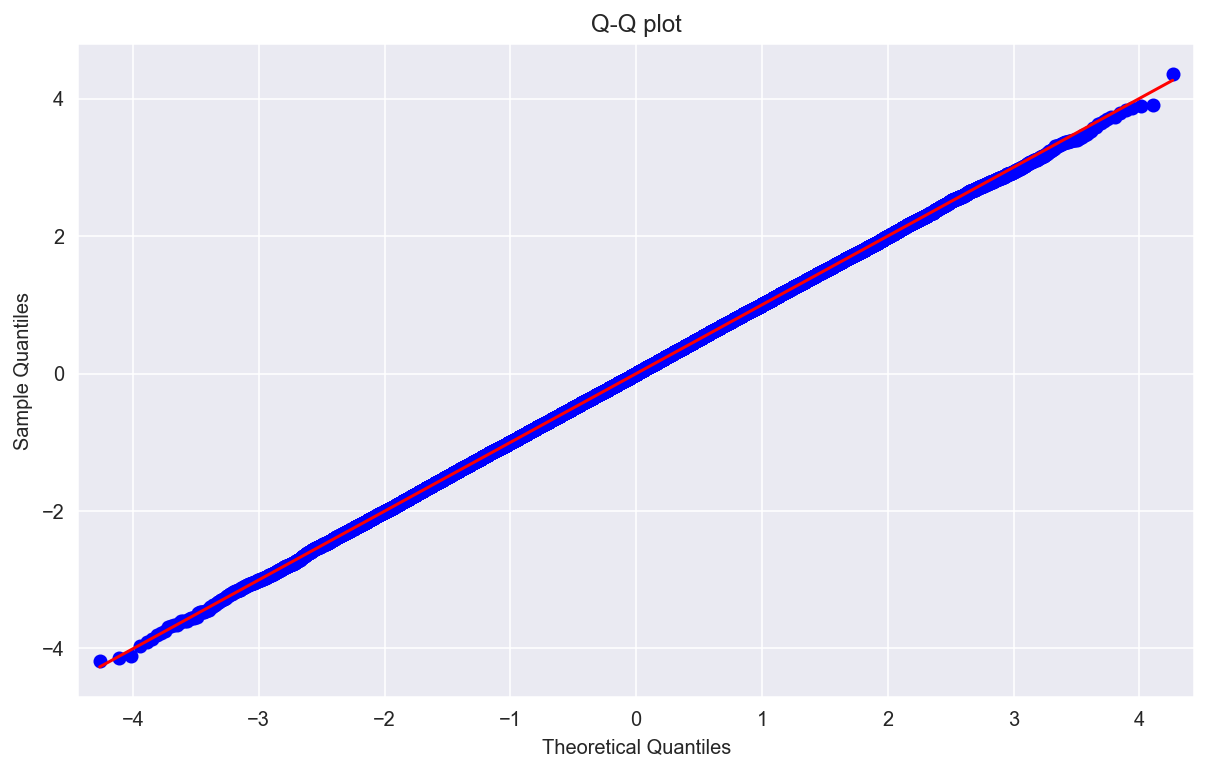

In [13]:
sm.ProbPlot(rv_std_norm).qqplot(line='s');
plt.title('Q-Q plot');

### Normal(1, 2.5)

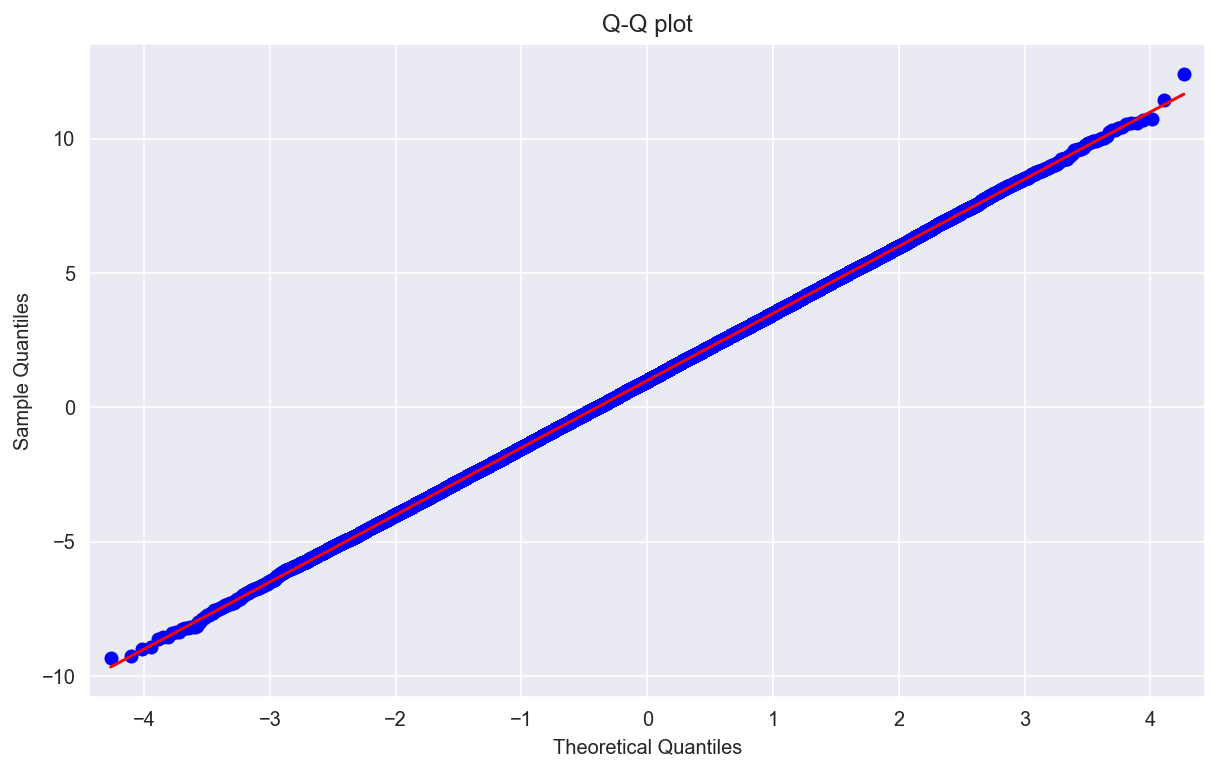

In [14]:
sm.ProbPlot(rv_norm).qqplot(line='s');
plt.title('Q-Q plot');

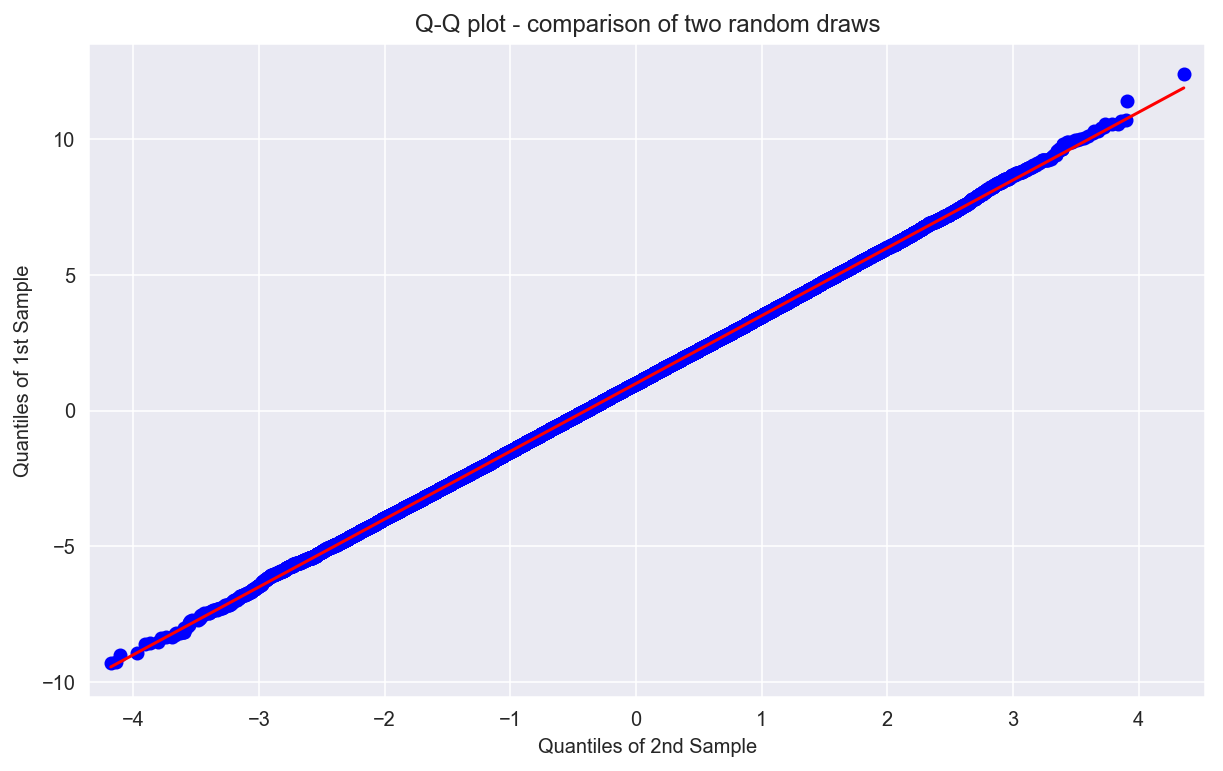

In [15]:
pp_x = sm.ProbPlot(rv_norm, fit=False)
pp_y = sm.ProbPlot(rv_std_norm, fit=False)
fig = pp_x.qqplot(line='s', other=pp_y)
plt.title('Q-Q plot - comparison of two random draws');
plt.show()

### Skew Normal a=5

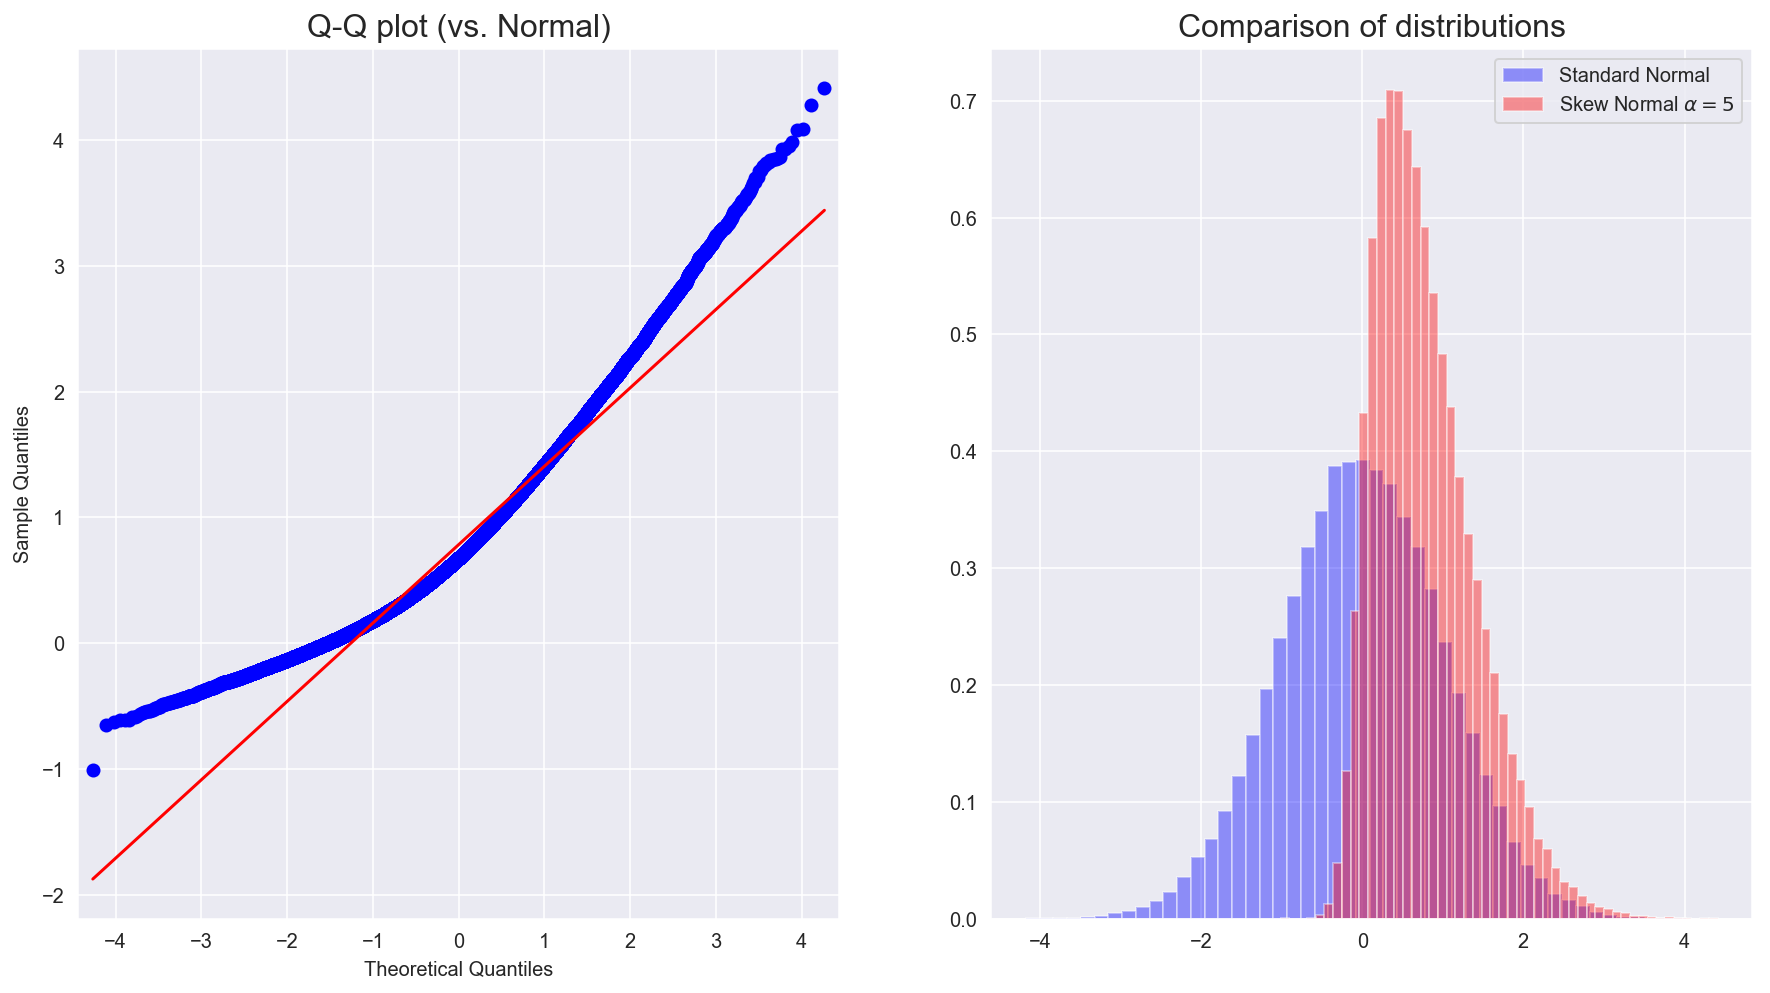

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sm.ProbPlot(rv_skew_norm).qqplot(line='s', ax=ax[0]);
ax[0].set_title('Q-Q plot (vs. Normal)', fontsize=16)

sns.distplot(rv_std_norm, kde=False, norm_hist=True, color='blue', label='Standard Normal', ax=ax[1])                                    
sns.distplot(rv_skew_norm, kde=False, norm_hist=True, color='red', label='Skew Normal $\\alpha = 5$', ax=ax[1])
plt.title('Comparison of distributions', fontsize=16)
plt.legend();

plt.show()

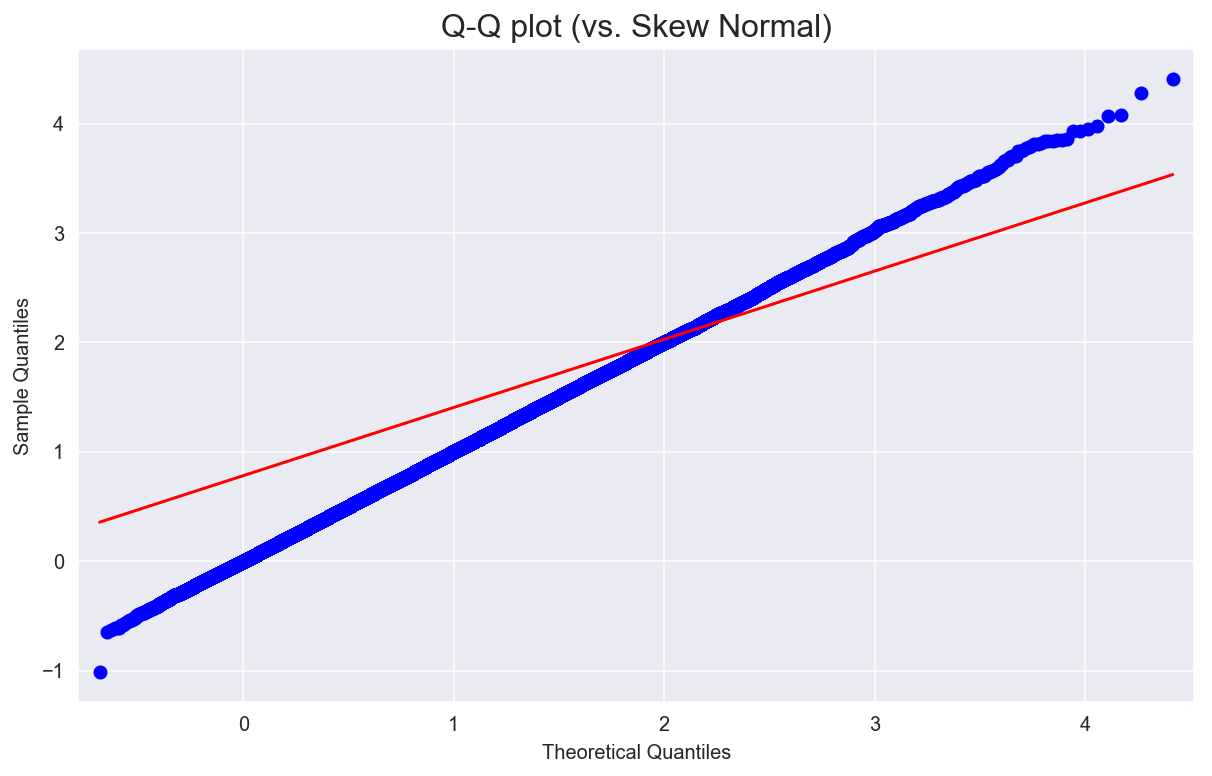

In [20]:
sm.ProbPlot(rv_skew_norm, scs.skewnorm, distargs=(5, )).qqplot(line='s');
plt.title('Q-Q plot (vs. Skew Normal)', fontsize=16);

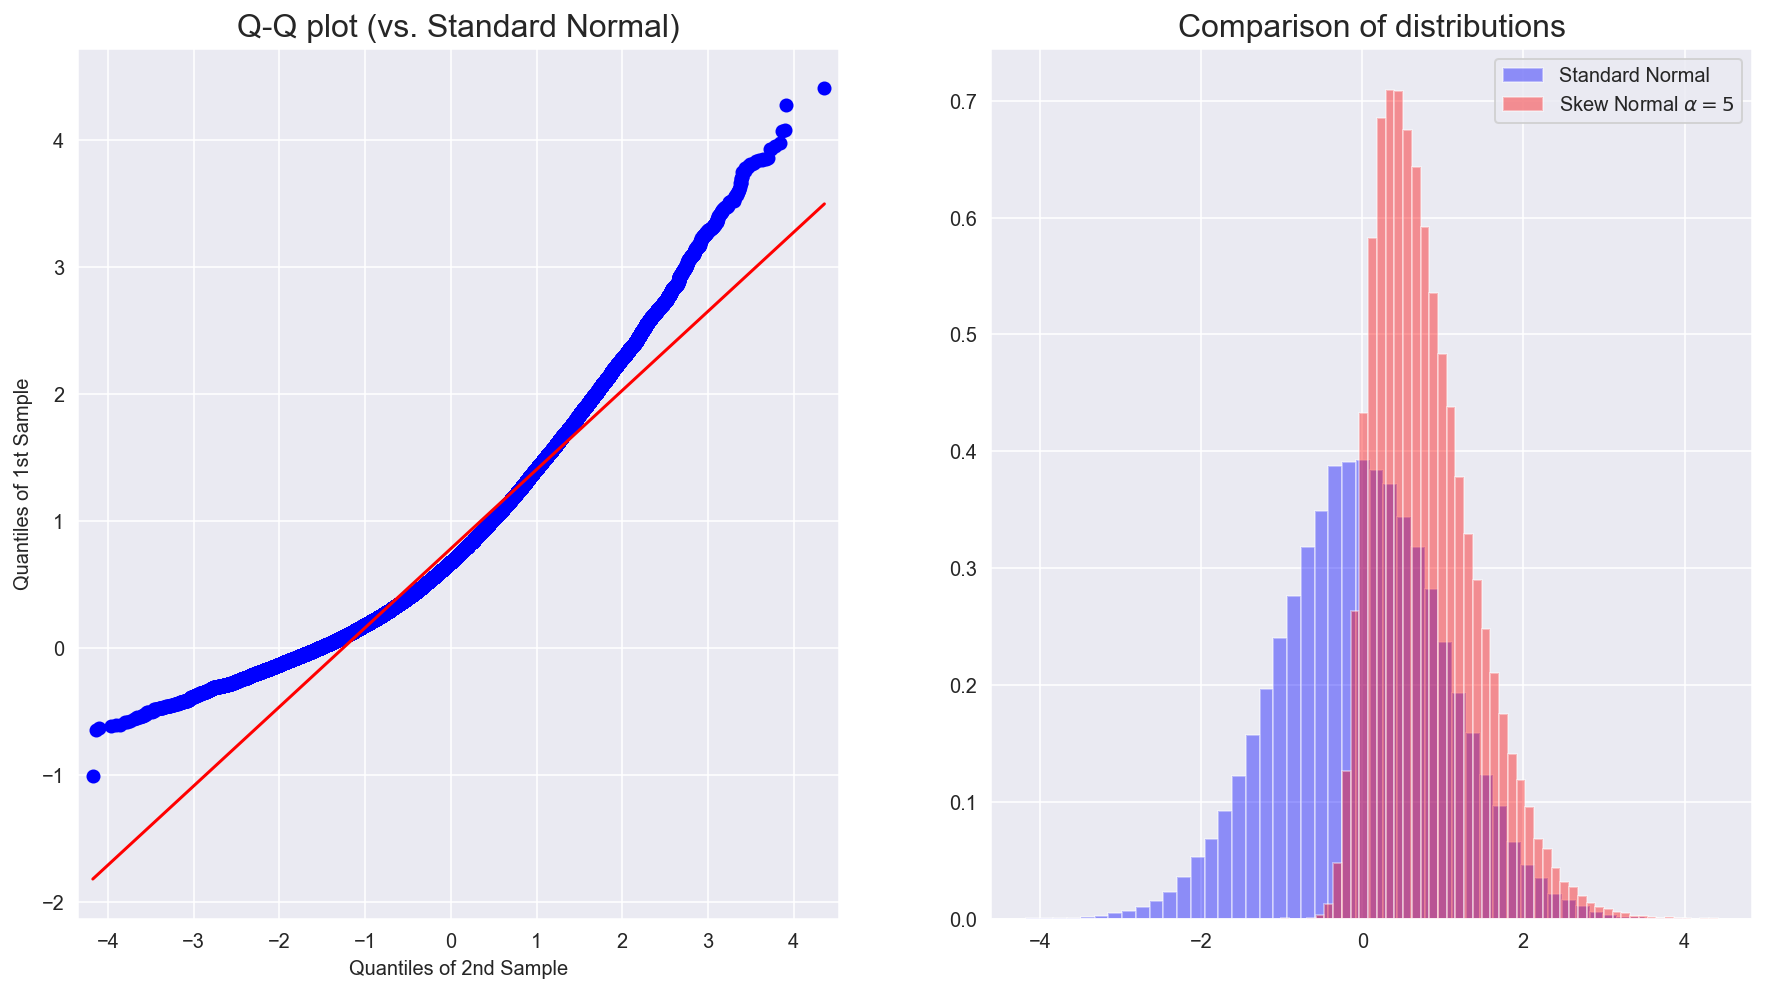

In [21]:
# comparing two empirical samples

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

pp_x = sm.ProbPlot(rv_skew_norm, fit=False)
pp_y = sm.ProbPlot(rv_std_norm, fit=False)
fig = pp_x.qqplot(line='s', other=pp_y, ax=ax[0])
ax[0].set_title('Q-Q plot (vs. Standard Normal)', fontsize=16)

sns.distplot(rv_std_norm, kde=False, norm_hist=True, color='blue', label='Standard Normal', ax=ax[1])                                    
sns.distplot(rv_skew_norm, kde=False, norm_hist=True, color='red', label='Skew Normal $\\alpha = 5$', ax=ax[1])
plt.title('Comparison of distributions', fontsize=16)
plt.legend();

plt.show()

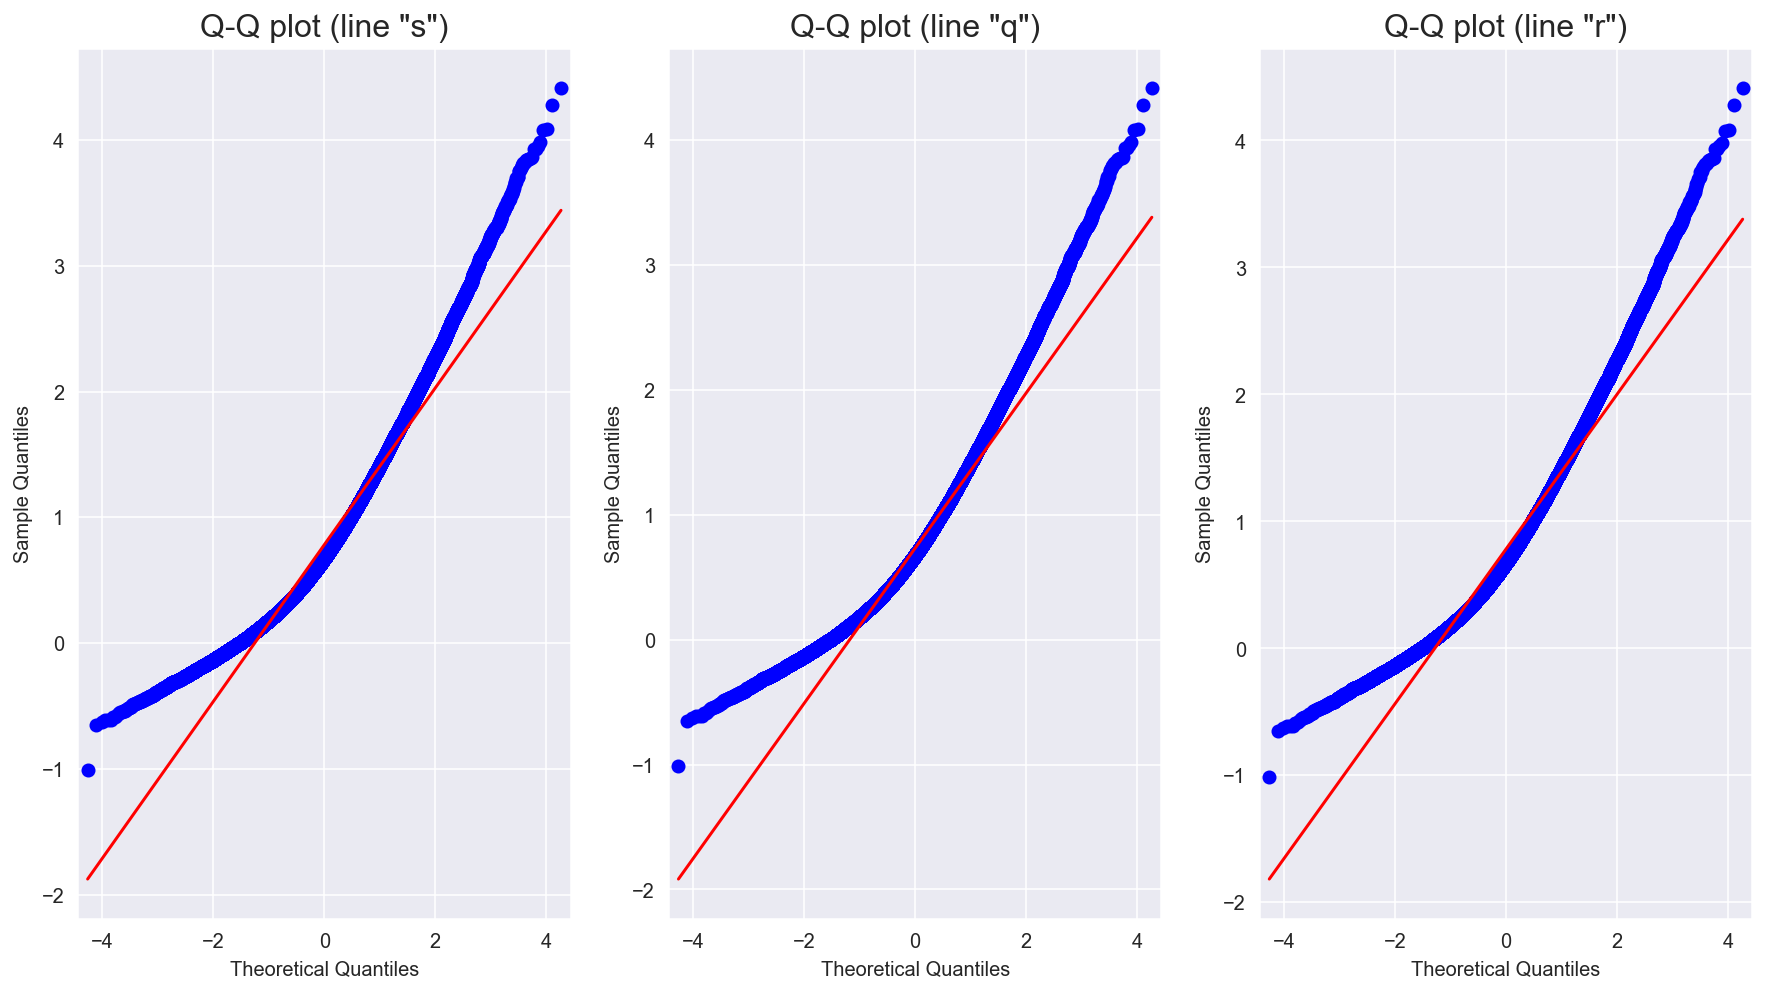

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(15, 8))

sm.ProbPlot(rv_skew_norm).qqplot(line='s', ax=ax[0]);
ax[0].set_title('Q-Q plot (line "s")', fontsize=16)

sm.ProbPlot(rv_skew_norm).qqplot(line='q', ax=ax[1]);
ax[1].set_title('Q-Q plot (line "q")', fontsize=16)

sm.ProbPlot(rv_skew_norm).qqplot(line='r', ax=ax[2]);
ax[2].set_title('Q-Q plot (line "r")', fontsize=16)

plt.show()

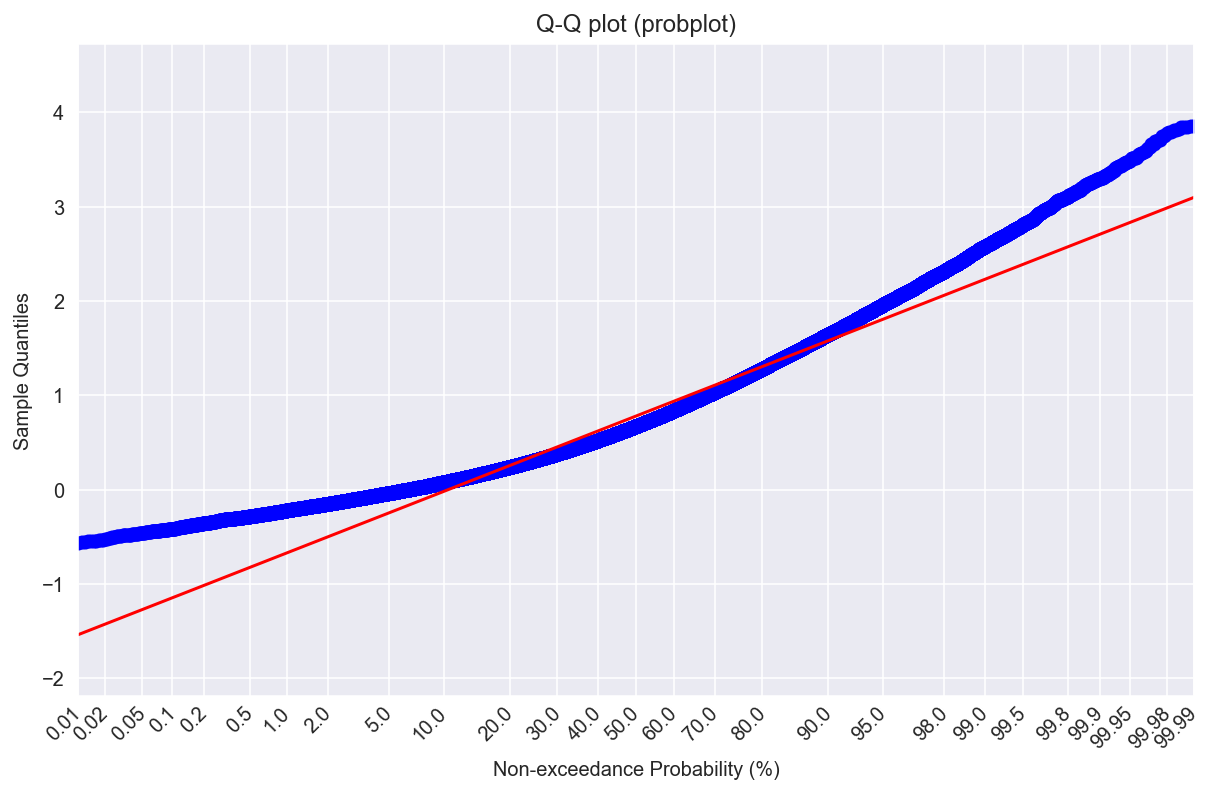

In [23]:
sm.ProbPlot(rv_skew_norm).probplot(line='s');
plt.title('Q-Q plot (probplot)');

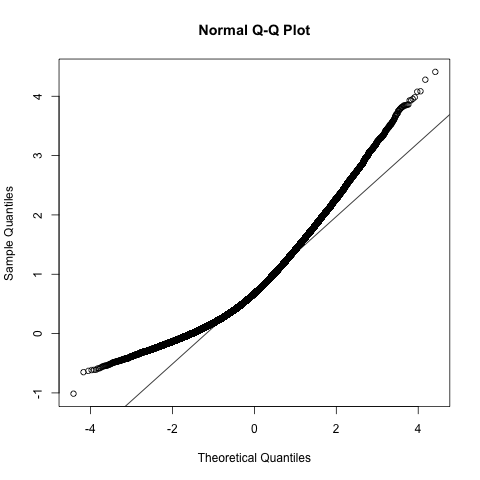

In [25]:
%%R -i rv_skew_norm

# sanity check in R :)

qqnorm(rv_skew_norm)
qqline(rv_skew_norm)